20191COM0075
Hemaraju s
5COM2

# Problem Statement

The head of HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a dataset that contains the data about the number of years of experience and the salary hike given accordingly. Build a Simple Linear Regression model with salary as the target variable.

Definition of Variable -:

1. Year of Experience (Input)
2. Salary Hike -> Hike in salary (Target)


# Approach to Solve the Business Case -:
1. Business Objective - Find Relationship between Salary Hike and Year of Experience
2. Perform EDA on data (Outlier, Missing Values).
3. Understand the relationship between the variable's using Scatter Plot.
4. Apply Simple linear regression with OLE to create base regression model( Vanilla Model)
5. Check the RMSE, R^2 & R values for the model.
5. Compare the Vanilla model with Model with Transformation's to check the best fit model.
   Transformation used
   1. Logarithmic
   2. Exponential
   3. Polynomial with degree 2
6. After comparing RMSE, R^2 & R values, Select the best model.
7. Train & Test your data on these model to check the performance of model on test data.



In [6]:
#Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import statsmodels.formula.api as smf


UsageError: Line magic function `%` not found.


In [7]:
#Import the dataset
sal = pd.read_csv("../input/salary/Salary.csv")

In [8]:
#Check the data
sal.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Change the Column Label to short Abbrevation for ease of Code handling.
Weight gained (grams) - wg
Calories Consumed - cc

### Rename Column for Ease of Coding

In [9]:
sal = sal.rename(columns={"Salary":"hike","YearsExperience":"years"})
sal.head(5)


,years,hike
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# 2. Perform EDA on data (Outlier, Missing Values)

#Exploratory Data Analysis
1. Check for the null Values in dataset.
2. Check for the outlier in dataset


In [10]:
# Check for Null Data - No Null values
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   years   35 non-null     float64
 1   hike    35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [11]:
sal.describe()


,years,hike
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


<AxesSubplot:xlabel='hike', ylabel='Count'>

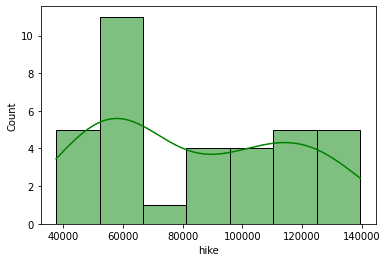

In [12]:
#Plot Histogram to view Distribution of data field ( Univariate)
sns.histplot(sal["hike"], color ='green',kde=True)

<AxesSubplot:xlabel='years', ylabel='Count'>

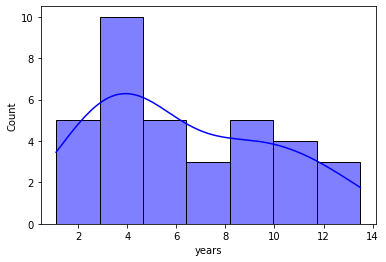

In [13]:
#Plot Histogram to view Distribution of data field ( Univariate) 
sns.histplot(sal["years"], color ='blue',kde=True)

#Outlier Identification
Use BoxPlot to Identify any outlier in data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hike'>

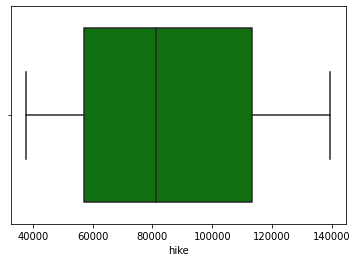

In [14]:
sns.boxplot(sal["hike"], color ='green')
# No Outlier found based on the boxplot analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='years'>

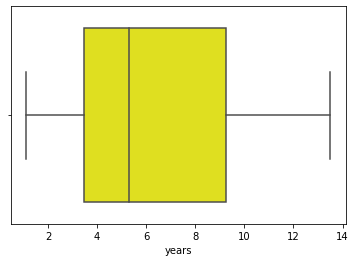

In [16]:
sns.boxplot(sal["years"], color ='yellow')
# No Outlier found based on the boxplot analysis

# 3. Apply Simple linear regression with OLS to create different regression model.


## 3.1    Model -1 - Vanilla Model ( No Transformation) - y = ax+b

<AxesSubplot:xlabel='years', ylabel='hike'>

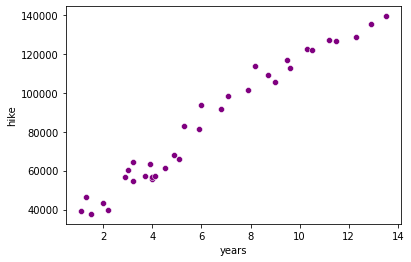

In [17]:
#Check the relation between Variable by Scatter Plot & Correlation Coefficient.
sns.scatterplot(y="hike",x="years",data=sal, color = "purple" )
#Relation Type = Linear
#Direction - Positive Correlation
#Strength -Can't Comment


In [4]:
# Find the Correlation Coefficient (R) for the relation
# R tells the magnitude of strength of relation between y & x

In [18]:
np.corrcoef(sal["years"],sal["hike"])
# R value is above 0.85 means Correlation strength is High.

array([[1.        , 0.98242725],
       [0.98242725, 1.        ]])

In [19]:
#Use OLS & fit model on data
import statsmodels.formula.api as smf
model1= smf.ols('hike~years',data = sal).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     914.3
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.23e-25
Time:                        18:47:34   Log-Likelihood:                -353.66
No. Observations:                  35   AIC:                             711.3
Df Residuals:                      33   BIC:                             714.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.886e+04   2092.797     13.790      0.000    2.46e+04    3.31e+04
years       8731.9410    288.783     30.237      0.000    8144.407    9319.475
==============================================================================
Omnibus:                        1.704   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.498
Skew:                           0.372   Prob(JB):                        0.473
Kurtosis:                       2.313   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

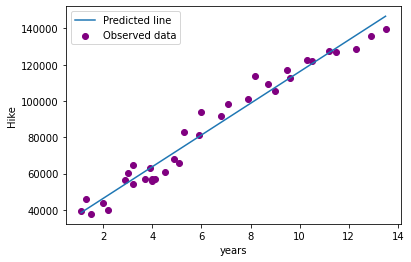

In [20]:
# Predict Regression Line Model1
pred1 = model1.predict(pd.DataFrame(sal['years']))
plt.scatter(x="years",y="hike",data=sal, color = "purple" )
plt.plot(sal['years'],pred1)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('years')
plt.ylabel('Hike')
plt.show()

In [21]:
# RMSE Error calculation (Model-1)
res1 = sal.hike - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

5916.65177221896

## 3.2 Model 2 {Log Transformation}, x = log(years); y = hike


array([[1.        , 0.94275493],
       [0.94275493, 1.        ]])

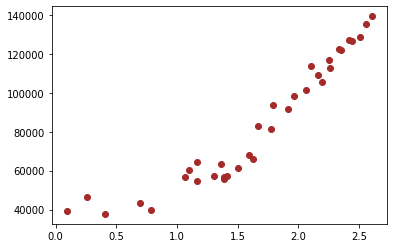

In [22]:
#Check the relation between Variable by Scatter Plot & Correlation Coefficient.
plt.scatter(x = np.log(sal['years']), y = sal['hike'], color = 'brown')
np.corrcoef(np.log(sal['years']),sal['hike'] ) #correlation


In [23]:
#Use OLS & fit model on data
model2= smf.ols('hike ~ np.log(years)',data = sal).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     263.7
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           2.66e-17
Time:                        18:47:46   Log-Likelihood:                -373.97
No. Observations:                  35   AIC:                             751.9
Df Residuals:                      33   BIC:                             755.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.021e+04   4898.980      2.085      0.045     247.046    2.02e+04
np.log(years)  4.474e+04   2755.115     16.240      0.000    3.91e+04    5.03e+04
==============================================================================
Omnibus:                        0.448   Durbin-Watson:                   0.439
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.381
Skew:                           0.234   Prob(JB):                        0.826
Kurtosis:                       2.796   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

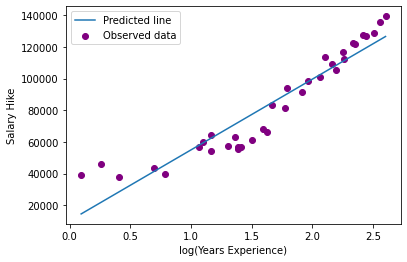

In [24]:
# Predict Regression Line for Model-2
pred2 = model2.predict(pd.DataFrame(sal['years']))
plt.scatter(x=np.log(sal["years"]),y="hike",data= sal, color = "purple" )
plt.plot(np.log(sal['years']),pred2)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('log(Years Experience)')
plt.ylabel('Salary Hike')
plt.show()

In [25]:
# RMSE Error calculation for Model-2
res2 = sal.hike- pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

10571.476134692335

## 3.3 Model-3 {Exponential Method}, y=log(hike), x=year

array([[1.        , 0.95969313],
       [0.95969313, 1.        ]])

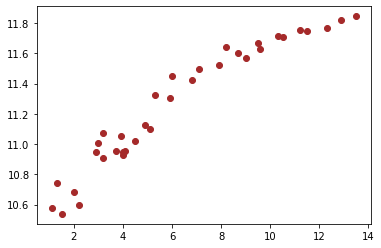

In [26]:
#Check the relation between Variable by Scatter Plot & Correlation Coefficient.
plt.scatter(x = sal['years'], y= np.log(sal['hike']), color = 'brown') # Scatter Plot for checking relation.
np.corrcoef(sal['years'],np.log(sal['hike']) ) #correlation

In [27]:
#Use OLS & fit model on data
import statsmodels.formula.api as smf
model3= smf.ols('np.log(hike) ~ years',data = sal).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(hike)   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     384.8
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           9.25e-20
Time:                        18:47:56   Log-Likelihood:                 26.953
No. Observations:                  35   AIC:                            -49.91
Df Residuals:                      33   BIC:                            -46.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5849      0.040    267.124      0.000      10.504      10.666
years          0.1073      0.005     19.616      0.000       0.096       0.118
==============================================================================
Omnibus:                        0.626   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.687
Skew:                          -0.106   Prob(JB):                        0.709
Kurtosis:                       2.347   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

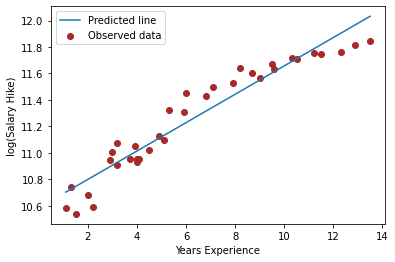

In [28]:
# Predict Regression Line for Model-3
pred3 = model3.predict(pd.DataFrame(sal['years']))
pred3_exp = np.exp(pred3)
plt.scatter(x =(sal['years']), y = np.log(sal['hike']), color = 'brown')
plt.plot(sal['years'],pred3)
plt.legend(['Predicted line', 'Observed data'])
plt.xlabel('Years Experience')
plt.ylabel('log(Salary Hike)')
plt.show()


In [29]:
# RMSE Error calculation
res3 = sal.hike - pred3_exp
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

10200.516603204116

## 3.4  Model-4 Polynomial of Transformation of Degree 2 ( Quadratic) , y=ax^2+bx+c --> {x = years ; x^2 =  (years)^2 ; y = hike}

In [30]:
#Use OLS & fit model on data
model4 = smf.ols('hike ~ years + I(years*years)', data = sal).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   hike   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     519.0
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           4.10e-25
Time:                        18:48:04   Log-Likelihood:                -350.99
No. Observations:                  35   AIC:                             708.0
Df Residuals:                      32   BIC:                             712.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.186e+04   3630.803      6.019      0.000    1.45e+04    2.93e+04
years             1.146e+04   1217.275      9.411      0.000    8976.863    1.39e+04
I(years * years)  -193.9004     84.449     -2.296      0.028    -365.917     -21.884
==============================================================================
Omnibus:                        0.820   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.664   Jarque-Bera (JB):                0.813
Skew:                           0.157   Prob(JB):                        0.666
Kurtosis:                       2.322   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
pred4 = model4.predict(pd.DataFrame(sal))
X = sal.iloc[:, 0:1].values


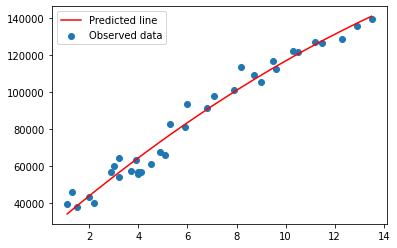

In [32]:
plt.scatter(sal.years,sal.hike)
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

In [33]:
# Error calculation
res4 = sal.hike - pred4
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

5482.262467661961

In [34]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE
0,SLR,5916.651772
1,Log model,10571.476135
2,Exp model,10200.516603
3,Poly model,5482.262468


In [ ]:
#Althought the R^2 & RMSE value is higher for Polynomial model but it is having p value higher than 5% Hence we will neglect this model.
#Our Best model is Base Model with No transfomation.( Vanilla Model)

# 4. Best Model Selection from 4 Model tested Based on R , R^2 & RMSE Values

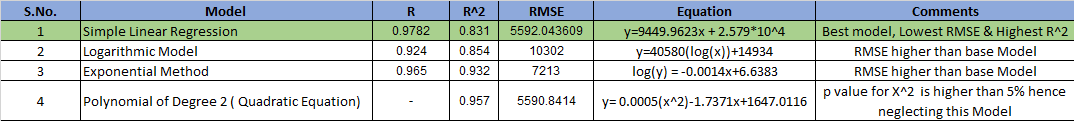

## 4.1. BEST MODEL - Vanilla Model ( y=mx+c,No Tranformation)

# 5. Train & Test your data on the Best model to check the performance of model on test data

In [1]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(sal, test_size = 0.25,random_state=6)

finalmodel = smf.ols('hike ~ years', data = train).fit()
finalmodel.summary()

ModuleNotFoundError: No module named 'sklearn'

In [36]:
# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
train_pred 


33    139780.315313
5      52853.113957
22     96316.714635
24    103270.890744
18     78931.274364
32    134564.683232
2      40683.305767
8      55460.929998
21     89362.538527
4      46768.209862
14     66761.466174
12     62415.106106
26    110225.066852
29    118917.786988
30    125002.691083
11     62415.106106
1      38944.761740
25    105878.706784
16     71977.098256
31    127610.507123
15     70238.554228
13     63284.378120
34    144995.947394
20     86754.722486
9      59807.290066
10     61545.834093
dtype: float64

In [37]:
# Model Evaluation on train data
train_res = train.hike - train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

5235.575922893785

In [38]:
# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
test_pred


7      55460.929998
27    111094.338866
23     98924.530676
0      37206.217713
17     73715.642283
28    117179.242961
3      45029.665835
19     79800.546378
6      53722.385971
dtype: float64

In [39]:
# Model Evaluation on Test data
test_res = test.hike - test_pred
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

8083.68880767068

# 6 Final Observation
Although Train data is giving better result than test data hence it looks like an overfit model. 
But since the RMSE value of Train & Test data is very Close, it can be Inferred Model will perform well in real life scenario with Unknown Data. 
Hence, we can predict the Salary Hike with higher accuracy based on Year’s of Experience data.


# Final R^2 Value = 97.3%